## Sesiones 3 y 4
<div style="text-align: right">
Victor Miguel Garcia Sanchez
</div>

---
## Ingeniería de Características
Carga de librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

Lectura de datos

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('sample_data/Houses.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Veamos el data_description con una funcion que nos permita leer solo las columnas que nos interesan

In [ ]:
# Leer el contenido del archivo data_description.txt
with open('sample_data/data_description.txt', 'r') as file:
    data_description = file.read()

def get_column_description(column_names, description_text):
    descriptions = {}
    lines = description_text.splitlines()

    for column in column_names:
        start_index = None
        for i, line in enumerate(lines):
            if line.startswith(column):
                start_index = i
                break

        if start_index is not None:
            end_index = start_index + 5  # Incluir 5 líneas después del inicio
            if end_index > len(lines):
                end_index = len(lines)

            description = "\n".join(lines[start_index:end_index])
            description = description + "\n ..."
            descriptions[column] = description
    return descriptions

# Ejemplo de uso
# Lista de columnas para las que se desea obtener descripciones
columns_to_find = ['GrLivArea', 'TotalBsmtSF']

# Obtener las descripciones
descriptions = get_column_description(columns_to_find, data_description)

# Imprimir las descripciones
for col, desc in descriptions.items():
    print(f"Descripción de {col}:\n...\n{desc}\n")
    print(df[[col]].describe())

Descripción de GrLivArea:
...
GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms
 ...

         GrLivArea
count  1460.000000
mean   1515.463699
std     525.480383
min     334.000000
25%    1129.500000
50%    1464.000000
75%    1776.750000
max    5642.000000
Descripción de TotalBsmtSF:
...
TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
 ...

       TotalBsmtSF
count  1460.000000
mean   1057.429452
std     438.705324
min       0.000000
25%     795.750000
50%     991.500000
75%    1298.250000
max    6110.000000


In [ ]:
df[['GrLivArea', 'TotalBsmtSF']].describe()

,GrLivArea,TotalBsmtSF
count,1460.000000,1460.000000
mean,1515.463699,1057.429452
std,525.480383,438.705324
min,334.000000,0.000000
25%,1129.500000,795.750000
50%,1464.000000,991.500000
75%,1776.750000,1298.250000
max,5642.000000,6110.000000


#### Transformaciones de Características
Escalamiento y Normalización

In [ ]:
# Escalamiento de características
scaler = StandardScaler()
df[['GrLivAreaEN', 'TotalBsmtSFEN']] = scaler.fit_transform(df[['GrLivArea', 'TotalBsmtSF']])

# Normalización de características
normalizer = MinMaxScaler()
df[['GrLivAreaEN', 'TotalBsmtSFEN']] = normalizer.fit_transform(df[['GrLivAreaEN', 'TotalBsmtSFEN']])
df[['GrLivAreaEN', 'TotalBsmtSFEN']].describe()

,GrLivAreaEN,TotalBsmtSFEN
count,1460.000000,1460.000000
mean,0.222582,0.173065
std,0.098998,0.071801
min,0.000000,0.000000
25%,0.149868,0.130237
50%,0.212886,0.162275
75%,0.271807,0.212480
max,1.000000,1.000000


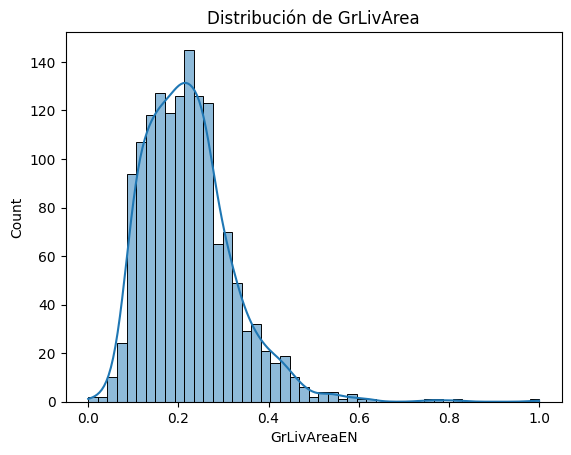

In [ ]:
# Histograma de la variable 'GrLivArea'
sns.histplot(df['GrLivAreaEN'], kde=True)
plt.title('Distribución de GrLivArea')
plt.show()

Transformación Logarítmica

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


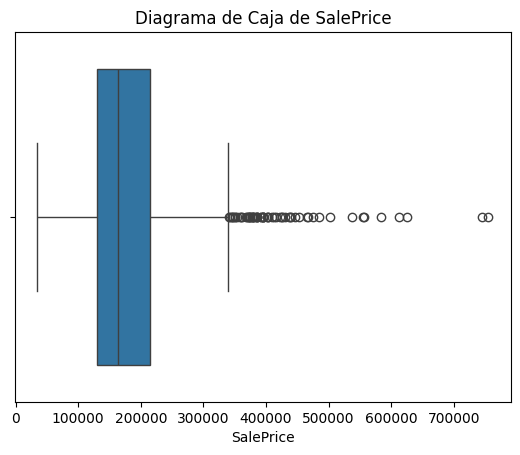

In [ ]:
# Diagrama de caja para 'SalePrice'
sns.boxplot(x=df['SalePrice'])
plt.title('Diagrama de Caja de SalePrice')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


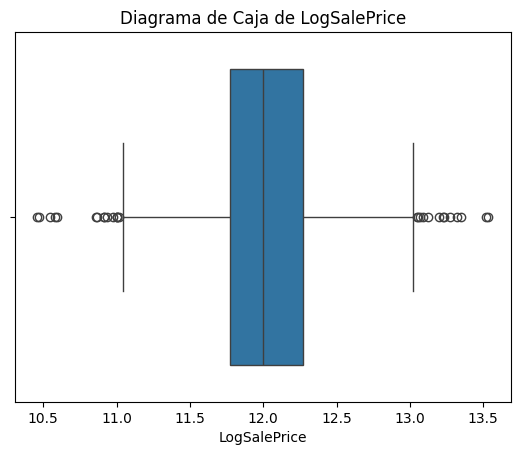

In [ ]:
# Transformación logarítmica del precio de venta
df['LogSalePrice'] = np.log(df['SalePrice'])

# Diagrama de caja para 'SalePrice'
sns.boxplot(x=df['LogSalePrice'])
plt.title('Diagrama de Caja de LogSalePrice')
plt.show()

#### Combinación de Características
Crear una nueva característica a partir de la suma de otras

In [ ]:
# Crear una característica 'TotalArea' sumando las áreas del primer piso, segundo piso y sótano
df['TotalArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

df[['TotalArea']] = scaler.fit_transform(df[['TotalArea']])
df[['TotalArea']] = normalizer.fit_transform(df[['TotalArea']])+1
df[['TotalArea']].describe()

,TotalArea
count,1460.000000
mean,1.195573
std,0.071967
min,1.000000
25%,1.146742
50%,1.187423
75%,1.233841
max,2.000000


#### Creación de Nuevas Características
Crear variables temporales o variables sinteticas

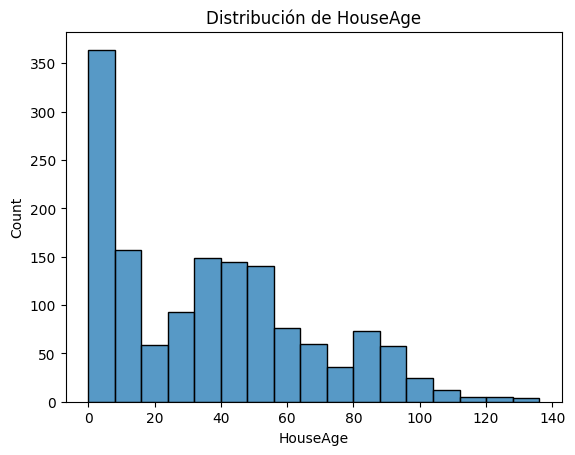

In [ ]:
# Crear una nueva característica 'HouseAge' basada en el año de construcción
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Histograma de la variable 'HouseAge'
sns.histplot(df['HouseAge'])
plt.title('Distribución de HouseAge')
plt.show()

Interacciones entre variables

In [ ]:
for col, desc in get_column_description(['OverallQual', 'GrLivArea', 'TotalArea'], data_description).items():
  print(f"Descripción de {col}:\n...\n{desc}\n")

Descripción de OverallQual:
...
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
 ...

Descripción de GrLivArea:
...
GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms
 ...



In [ ]:
# Interacción entre la calidad general de la casa y el área total
df['OverallQual_GarageArea_Division'] = df['OverallQual'] / (df['TotalArea'])
df[['OverallQual_GarageArea_Division']].describe()

,OverallQual_GarageArea_Division
count,1460.000000
mean,5.074034
std,0.974925
min,0.901113
25%,4.355357
50%,5.082196
75%,5.786707
max,8.093280


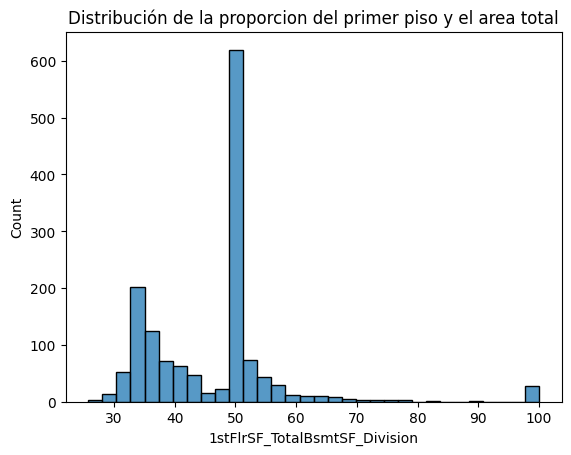

In [ ]:
# Interacción entre el área del primer piso y el área total
df['1stFlrSF_TotalBsmtSF_Division'] = df['1stFlrSF']/(df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])*100

# Histograma de la variable '1stFlrSF_TotalBsmtSF_Division'
sns.histplot(df['1stFlrSF_TotalBsmtSF_Division'])
plt.title('Distribución de la proporcion del primer piso y el area total')
plt.show()

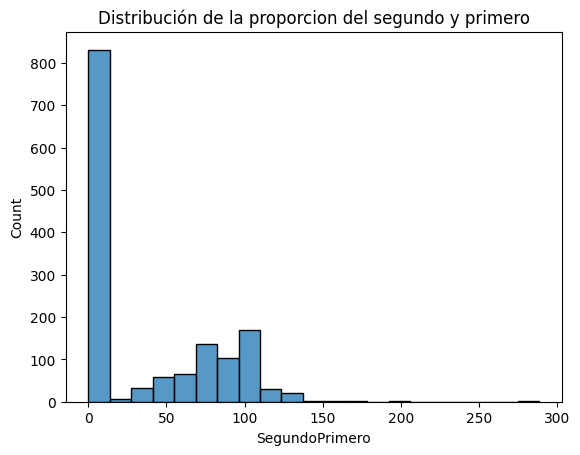

In [ ]:
# Interacción entre el área del primer piso y el área total
df['SegundoPrimero'] = df['2ndFlrSF']/(df['1stFlrSF'])*100

# Histograma de la variable '1stFlrSF_TotalBsmtSF_Division'
sns.histplot(df['SegundoPrimero'])
plt.title('Distribución de la proporcion del segundo y primero')
plt.show()

## Imputación de Datos Faltantes


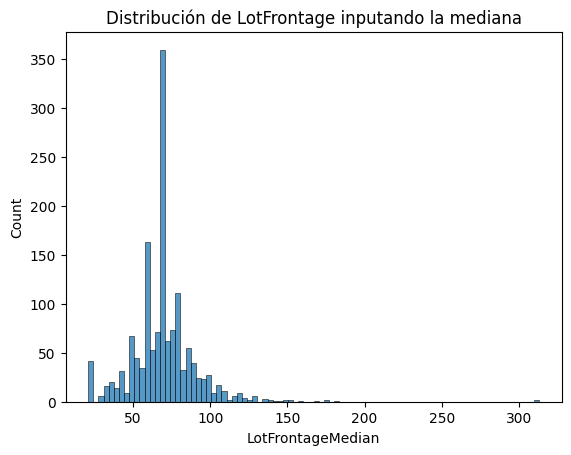

In [ ]:
# Imputar valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
df['LotFrontageMedian'] = imputer.fit_transform(df[['LotFrontage']])

# Histograma de la variable 'LotFrontage'
sns.histplot(df['LotFrontageMedian'])
plt.title('Distribución de LotFrontage inputando la mediana')
plt.show()

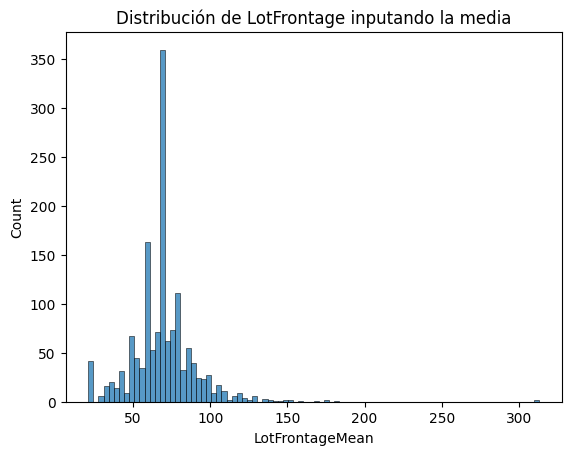

In [ ]:
# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df['LotFrontageMean'] = imputer.fit_transform(df[['LotFrontage']])

# Histograma de la variable 'LotFrontage'
sns.histplot(df['LotFrontageMean'])
plt.title('Distribución de LotFrontage inputando la media')
plt.show()

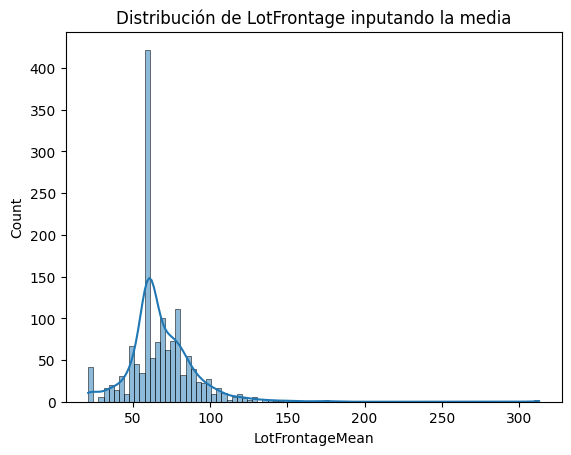

In [ ]:
# Imputar valores faltantes con un valor fijo
imputer = SimpleImputer(strategy='constant', fill_value=60)
df['LotFrontageMean'] = imputer.fit_transform(df[['LotFrontage']])

# Histograma de la variable 'LotFrontage'
sns.histplot(df['LotFrontageMean'], kde=True)
plt.title('Distribución de LotFrontage inputando la media')
plt.show()

In [ ]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GrLivAreaEN,TotalBsmtSFEN,LogSalePrice,TotalArea,HouseAge,OverallQual_GarageArea_Division,1stFlrSF_TotalBsmtSF_Division,SegundoPrimero,LotFrontageMedian,LotFrontageMean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0.259231,0.140098,12.247694,1.195481,5,5.855385,33.359314,99.766355,65.0,65.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0.174830,0.206547,12.109011,1.191802,31,5.034392,50.000000,0.000000,80.0,80.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0.273549,0.150573,12.317167,1.207742,7,5.795939,33.998522,94.130435,68.0,68.0


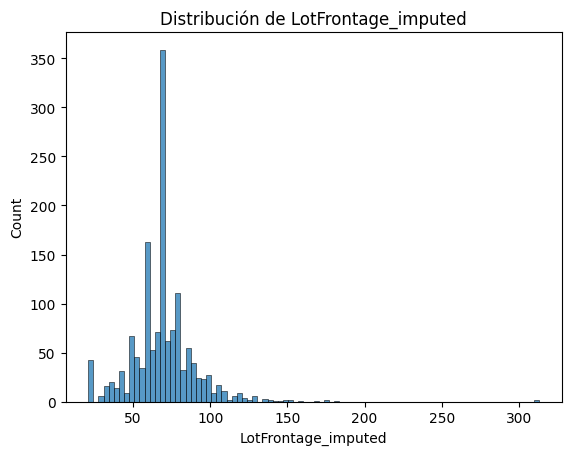

70.04995836802665

In [ ]:
# Crear el imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar valores faltantes en la columna LotFrontage
df['LotFrontage_imputed'] = knn_imputer.fit_transform(df[['LotFrontage']])

# Histograma de la variable 'LotFrontage'
sns.histplot(df['LotFrontage_imputed'])
plt.title('Distribución de LotFrontage_imputed')
plt.show()
df['LotFrontage_imputed'].mode()[0]

Imputación por Valores Adelante (Forward Fill) o Atrás (Backward Fill)

In [ ]:
for col, desc in get_column_description(['FireplaceQu'], data_description).items():
  print(f"Descripción de {col}:\n...\n{desc}\n")
print(df['FireplaceQu'].isnull().sum(), " valores faltantes")

Descripción de FireplaceQu:
...
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
 ...

690  valores faltantes


In [ ]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

<ipython-input-137-6d7e024133a6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FireplaceQu'] = df['FireplaceQu'].fillna(method='ffill')
<ipython-input-137-6d7e024133a6>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FireplaceQu'] = df['FireplaceQu'].fillna(method='bfill')


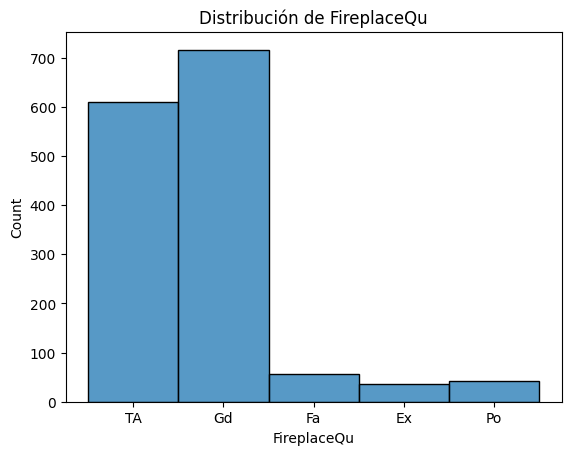

In [ ]:
# Imputación por valores adelante (forward fill)
df['FireplaceQu'] = df['FireplaceQu'].fillna(method='ffill')

# Imputación por valores atrás (backward fill)
df['FireplaceQu'] = df['FireplaceQu'].fillna(method='bfill')

# Histograma de la variable 'LotFrontage'
sns.histplot(df['FireplaceQu'])
plt.title('Distribución de FireplaceQu')
plt.show()

Estos métodos de imputación son útiles cuando los datos faltantes tienen cierto tipo de patrón o tendencia en el conjunto de datos. Por ejemplo, si los datos están ordenados en función de alguna característica y los valores faltantes aparecen en secuencia, estos métodos pueden ser útiles para propagar el último o el siguiente valor conocido a través de las filas.
## Codificación
Codificación One-Hot

In [ ]:
# Lista de columnas para las que se desea obtener descripciones
columns_to_find = ['MSZoning', 'Street']

# Obtener las descripciones
descriptions = get_column_description(columns_to_find, data_description)

# Imprimir las descripciones
for col, desc in descriptions.items():
    print(f"Descripción de {col}:\n...\n{desc}\n")
    print(df[[col]].describe())

Descripción de MSZoning:
...
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
 ...

       MSZoning
count      1460
unique        5
top          RL
freq       1151
Descripción de Street:
...
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
 ...

       Street
count    1460
unique      2
top      Pave
freq     1454


In [ ]:
# Codificación one-hot para las variables categóricas 'MSZoning' y 'Street'
encoder = OneHotEncoder(drop='first')

# Ajustamos y transformamos las columnas 'MSZoning' y 'Street'
encoded_vars = encoder.fit_transform(df[['MSZoning', 'Street']])

# Convertimos la matriz dispersa a una matriz densa
encoded_array = encoded_vars.toarray()

# Creamos un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['MSZoning', 'Street']))

# Concatenamos el DataFrame codificado con el DataFrame original
df = pd.concat([df, encoded_df], axis=1)

# Eliminamos las columnas originales 'MSZoning' y 'Street'
df.drop(columns=['MSZoning', 'Street'], inplace=True)

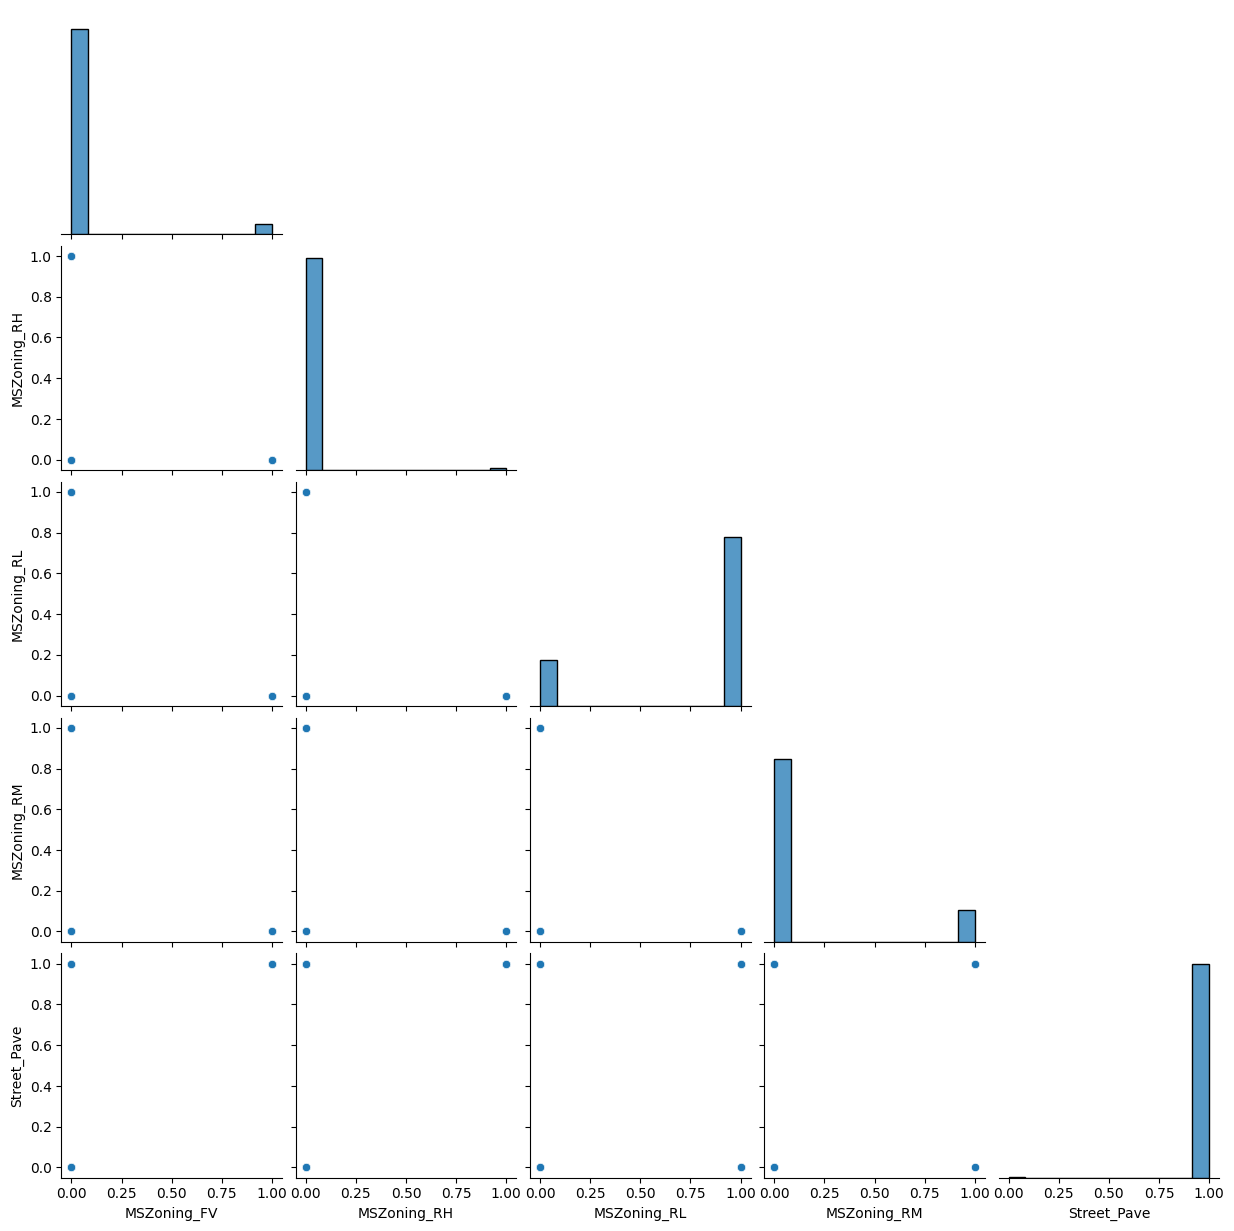

In [ ]:
#Pairplot
sns.pairplot(encoded_df, corner=True)
plt.show()

## Escalamiento y transformaciones
Estandarización de variables numéricas

In [ ]:
# Seleccionar solo las columnas numéricas para la estandarización
numeric_columns = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

df[numeric_columns].describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110
std,125.338794,66.256028,61.119149
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,25.000000,0.000000
75%,168.000000,68.000000,0.000000
max,857.000000,547.000000,552.000000


In [ ]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas numéricas seleccionadas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df[numeric_columns].describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1.460000e+03,1.460000e+03,1.460000e+03
mean,8.760116e-17,6.083414e-19,8.516779e-18
std,1.000343e+00,1.000343e+00,1.000343e+00
min,-7.899417e-01,-7.563755e-01,-3.683857e-01
25%,-7.899417e-01,-7.563755e-01,-3.683857e-01
50%,-7.899417e-01,-3.140652e-01,-3.683857e-01
75%,6.753582e-01,4.033205e-01,-3.683857e-01
max,4.883868e+00,6.103881e+00,7.082040e+00


Normalización de variables numéricas

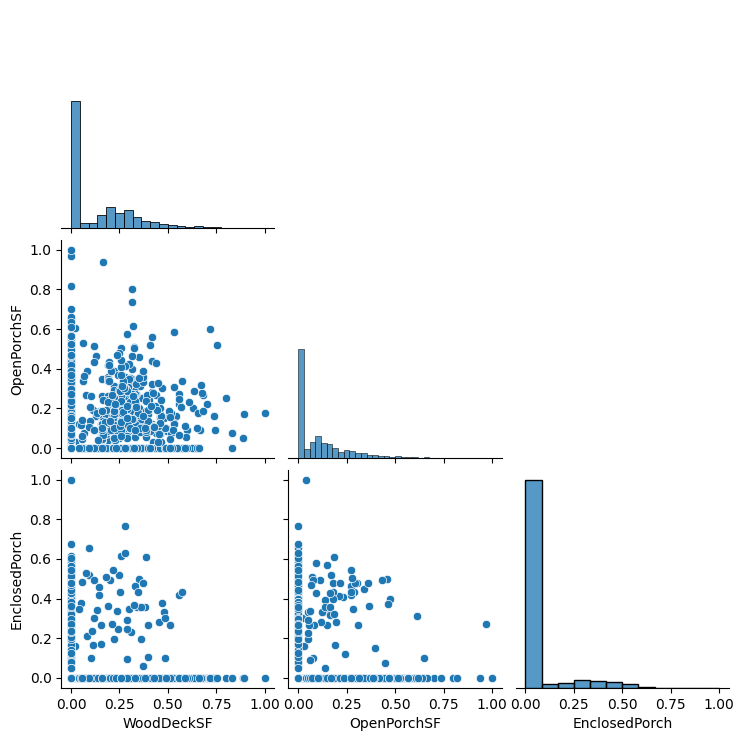

In [ ]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas numéricas seleccionadas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#Pairplot
sns.pairplot(df[numeric_columns[0:6]], corner=True)
plt.show()

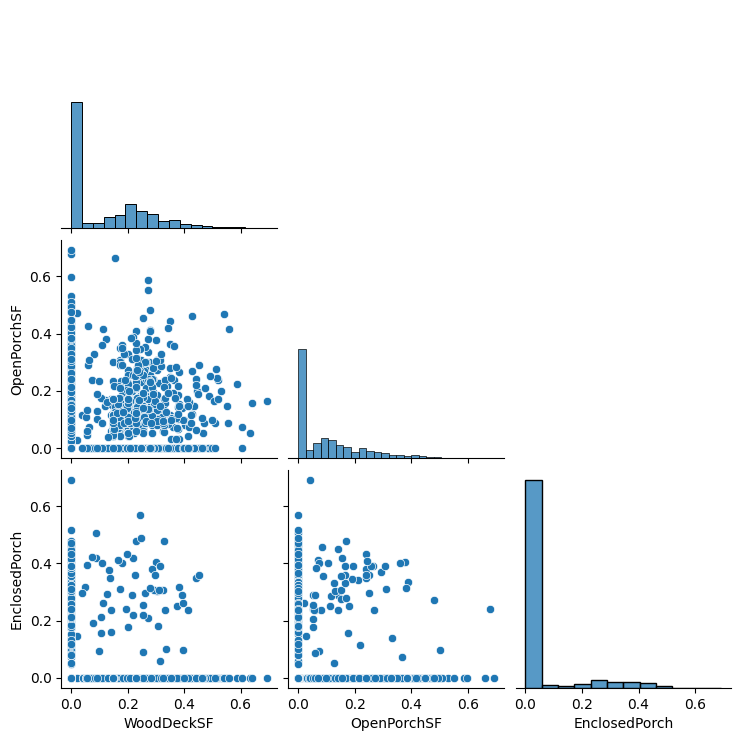

In [ ]:
# Aplicar la transformación de logaritmo a las columnas numéricas seleccionadas
df[numeric_columns] = np.log1p(df[numeric_columns])
#Pairplot
sns.pairplot(df[numeric_columns[0:6]], corner=True)
plt.show()

Binning (discretización) de variables numéricas:

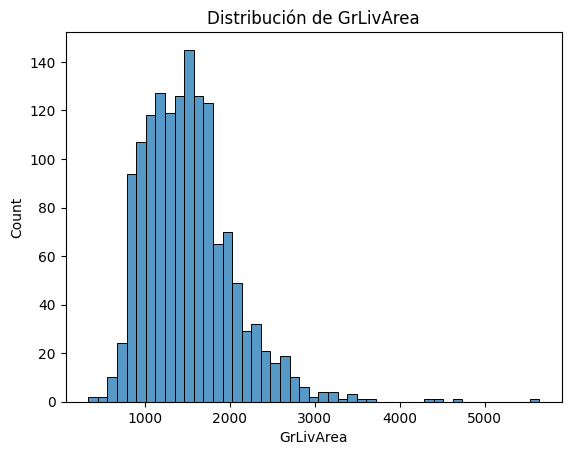

In [ ]:
# Histograma de la variable 'GrLivArea'
sns.histplot(df['GrLivArea'])
plt.title('Distribución de GrLivArea')
plt.show()

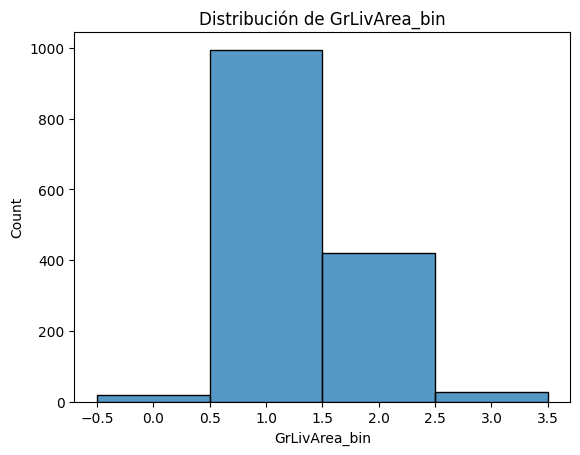

In [ ]:
# Definir los bordes de los bins
bins = [0, 700, 1700, 2800, np.inf]

# Definir las etiquetas para los bins
labels = [0, 1, 2, 3]

# Discretizar la variable 'GrLivArea' utilizando los bins y etiquetas definidos
df['GrLivArea_bin'] = pd.cut(df['GrLivArea'], bins=bins, labels=labels)

# Histograma de la variable 'GrLivArea_bin'
sns.histplot(df['GrLivArea_bin'])
plt.title('Distribución de GrLivArea_bin')
plt.show()